In [6]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate


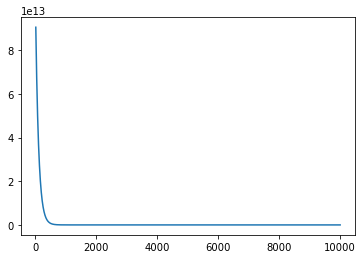

In [123]:
# Constants
G=6.6743e-11 # Newtons's constant /m^3 kg^-1 s^-2
d0=1e+14*1e-3 # Core density /kg/m^3
R=10e+3 # radius /m

# Density as function of fraction of total radius

def dens(r,R):
    d0=1e+14
    x=1e-2
    p=1
    d=(r<=R)*d0*np.exp(-100*r/R)  +0*(r>R)
    #d=(r<R)*d0*np.exp(-r/(0.5*R))+(r>=R)*0
    return d

x=np.linspace(R/1000,R,1000)
y=np.zeros(x.size)

for k in range(x.size):
    y[k]=dens(x[k],R)

plt.plot(x,dens(x,R))

In [124]:
R=10000*np.linspace(0.8,1.2,10)
M=np.zeros(R.size)
U=np.zeros(R.size)

import scipy.integrate as integrate
for j in range(R.size):
    
    # Mass
    M[j],err_M=integrate.quad(lambda x: 4*np.pi*(x**2)*dens(x,R[j]),0,R[j])
    # Binding energy
    # x=s, y=r
    def f(x,y):
        return G*4*np.pi*y*dens(y,R[j])*4*np.pi* (x**2) *dens(x,R[j])
    
    def bounds_y():
        return [0, R[j]]
    
    def bounds_x(y):
        return [0, y]
    
    U[j],err_U=integrate.nquad(f, [bounds_x, bounds_y])

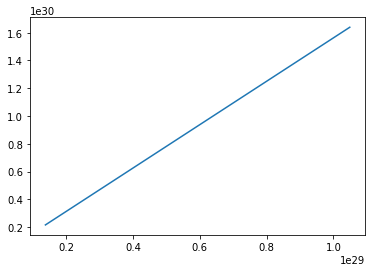

In [125]:
plt.plot(G*M**2/R,U)

In [126]:
U/(G*M**2/R)

array([15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625, 15.625,
       15.625, 15.625])